In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer



In [4]:
#importing dataset
df=pd.read_csv('amazon.csv')
df
pd.set_option('display.max_columns', None)

df['reviewerName']

df['reviewText']

df.drop(columns='Unnamed: 0',inplace=True)
df

X=df['reviewText']
X

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewerName          4914 non-null   object 
 1   overall               4915 non-null   int64  
 2   reviewText            4914 non-null   object 
 3   reviewTime            4915 non-null   object 
 4   day_diff              4915 non-null   int64  
 5   helpful_yes           4915 non-null   int64  
 6   helpful_no            4915 non-null   int64  
 7   total_vote            4915 non-null   int64  
 8   score_pos_neg_diff    4915 non-null   int64  
 9   score_average_rating  4915 non-null   float64
 10  wilson_lower_bound    4915 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 422.5+ KB


In [5]:
import re


In [6]:
def remove_float_values(reviewText):
    # Ensure 'text' is a string
    if not isinstance(reviewText, str):
        return reviewText  # If it's not a string, return it as is (pass-through)

    # Regular expression pattern to match float values
    float_pattern = r'\b\d+\.\d+\b|\b\d+\b'

    # Use the sub() method to replace float values with an empty string
    cleaned_text = re.sub(float_pattern, '', reviewText)

    return cleaned_text
df['reviewText'] = df['reviewText'].apply(remove_float_values)


In [7]:
# remove both the leading and the trailing characters
def strip_text(reviewText):
    # Check if the value is a string before applying the strip() method
    return reviewText.strip() if isinstance(reviewText, str) else reviewText

In [8]:
# Apply the strip_text function to the 'reviewText' column
df['reviewText'] = df['reviewText'].apply(strip_text)


In [9]:
#removes empty strings, because they are considered in Python as False
df=[Text for Text in df if Text]


df=[reviewText for reviewText in df if reviewText]
df[0:10]
df

['reviewerName',
 'overall',
 'reviewText',
 'reviewTime',
 'day_diff',
 'helpful_yes',
 'helpful_no',
 'total_vote',
 'score_pos_neg_diff',
 'score_average_rating',
 'wilson_lower_bound']

In [10]:
# Joining the list into one string/text
text = ' '.join(df)
text
type(text)
len(text)

144

In [11]:
#Generate wordcloud
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [12]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(15, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");

In [13]:
# Generate wordcloud
type(STOPWORDS)
stopwords = STOPWORDS
len(stopwords)
text
type(text)

str

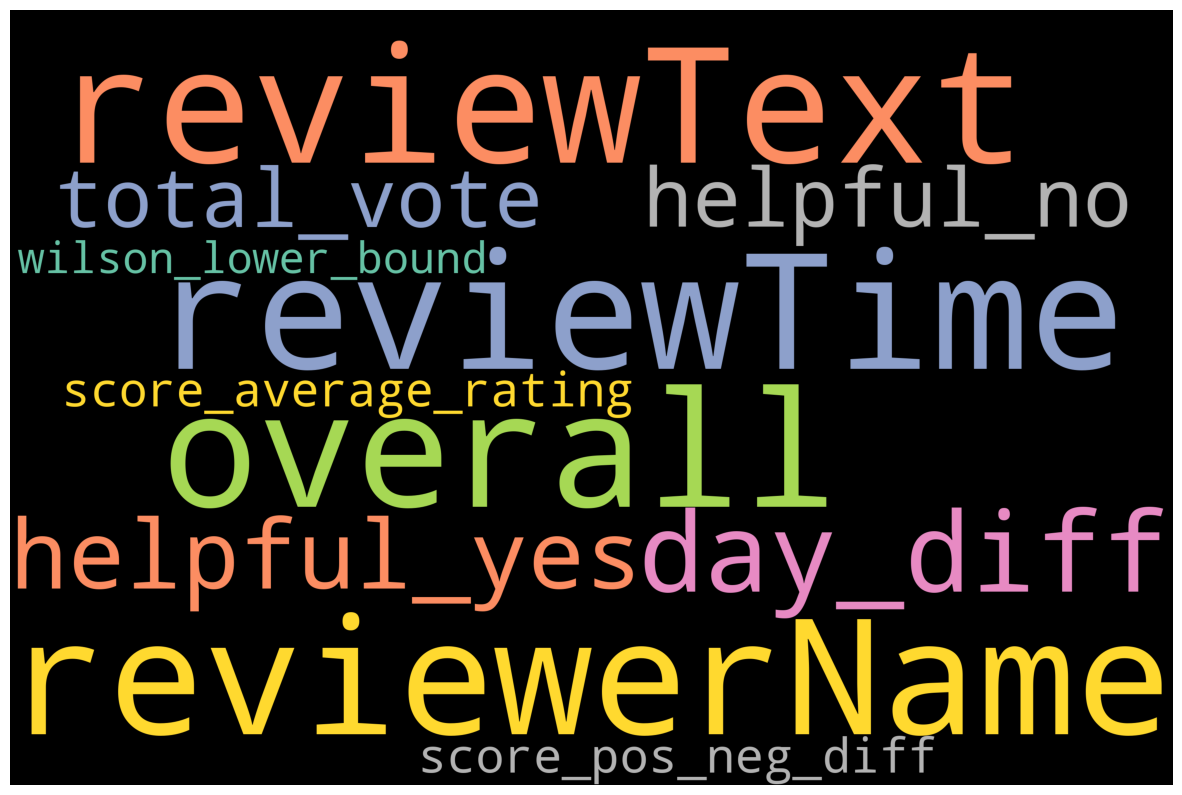

In [14]:
# Plot
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)

In [15]:
#text preprocessing start
#Punctuation
import string # special operations on strings
no_punc_text = text.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'reviewerName overall reviewText reviewTime daydiff helpfulyes helpfulno totalvote scoreposnegdiff scoreaveragerating wilsonlowerbound'

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
len(text_tokens)
print(text_tokens[0:50])

['reviewerName', 'overall', 'reviewText', 'reviewTime', 'daydiff', 'helpfulyes', 'helpfulno', 'totalvote', 'scoreposnegdiff', 'scoreaveragerating', 'wilsonlowerbound']


In [19]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords

In [20]:
#nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')

no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
len(no_stop_tokens)
print(no_stop_tokens[0:40])

['reviewerName', 'overall', 'reviewText', 'reviewTime', 'daydiff', 'helpfulyes', 'helpfulno', 'totalvote', 'scoreposnegdiff', 'scoreaveragerating', 'wilsonlowerbound']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
# joining the words in to single document
doc = ' '.join(my_stop_words)
doc
print(doc[0:40])


i me my myself we our ours ourselves you


In [24]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
#Lemmatization
from nltk.stem import WordNetLemmatizer
Lemmatizer = WordNetLemmatizer()

lemmas = []
for token in doc.split():
    lemmas.append(Lemmatizer.lemmatize(token))

print(lemmas)
type(lemmas)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'it', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'wa', 'were', 'be', 'been', 'being', 'have', 'ha', 'had', 'having', 'do', 'doe', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'a', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',

list

In [26]:
#text preprocessing end

#feature extraction start
#how we converted in features
#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
X


<179x143 sparse matrix of type '<class 'numpy.int64'>'
	with 175 stored elements in Compressed Sparse Row format>

In [27]:
# every word and its position in the X
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(30)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names_out()[0:11])
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray()[50:100])

{'me': 66, 'my': 71, 'myself': 72, 'we': 123, 'our': 85, 'ours': 86, 'ourselves': 87, 'you': 138, 're': 91, 've': 119, 'll': 64, 'your': 139, 'yours': 140, 'yourself': 141, 'yourselves': 142, 'he': 47, 'him': 52, 'his': 54, 'himself': 53, 'she': 94, 'her': 48, 'hers': 50, 'herself': 51, 'it': 61, 'itself': 62, 'they': 110, 'them': 105, 'their': 103, 'theirs': 104, 'themselves': 106, 'what': 126, 'which': 129, 'who': 131, 'whom': 132, 'this': 111, 'that': 101, 'these': 109, 'those': 112, 'am': 7, 'is': 59, 'are': 11, 'wa': 121, 'were': 124, 'be': 14, 'been': 16, 'being': 18, 'have': 44, 'ha': 40, 'had': 41, 'having': 46, 'do': 28, 'doe': 29, 'did': 26, 'doing': 31, 'an': 8, 'the': 102, 'and': 9, 'but': 22, 'if': 56, 'or': 83, 'because': 15, 'until': 117, 'while': 130, 'of': 78, 'at': 13, 'by': 23, 'for': 37, 'with': 135, 'about': 0, 'against': 4, 'between': 20, 'into': 58, 'through': 113, 'during': 34, 'before': 17, 'after': 2, 'above': 1, 'below': 19, 'to': 114, 'from': 38, 'up': 118, 

In [28]:
#feature extraction end

#identifying combination of words, bigram,s trigrams
#Let's see how can bigrams and trigrams can be included here
#Bigram
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,1),max_features = 120)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)
bow_matrix_ngram
type(df)

list

In [29]:
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

print(vectorizer_ngram_range.get_feature_names_out())
w1 = list(vectorizer_ngram_range.get_feature_names_out())
type(w1)
w2 = ' '.join(w1)
w2
type(w2)

stopwords = set([word.lower() for word in STOPWORDS])


['day_diff' 'helpful_no' 'helpful_yes' 'overall' 'reviewername'
 'reviewtext' 'reviewtime' 'score_average_rating' 'score_pos_neg_diff'
 'total_vote' 'wilson_lower_bound']
[[0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]]
['day_diff' 'helpful_no' 'helpful_yes' 'overall' 'reviewername'
 'reviewtext' 'reviewtime' 'score_average_rating' 'score_pos_neg_diff'
 'total_vote' 'wilson_lower_bound']


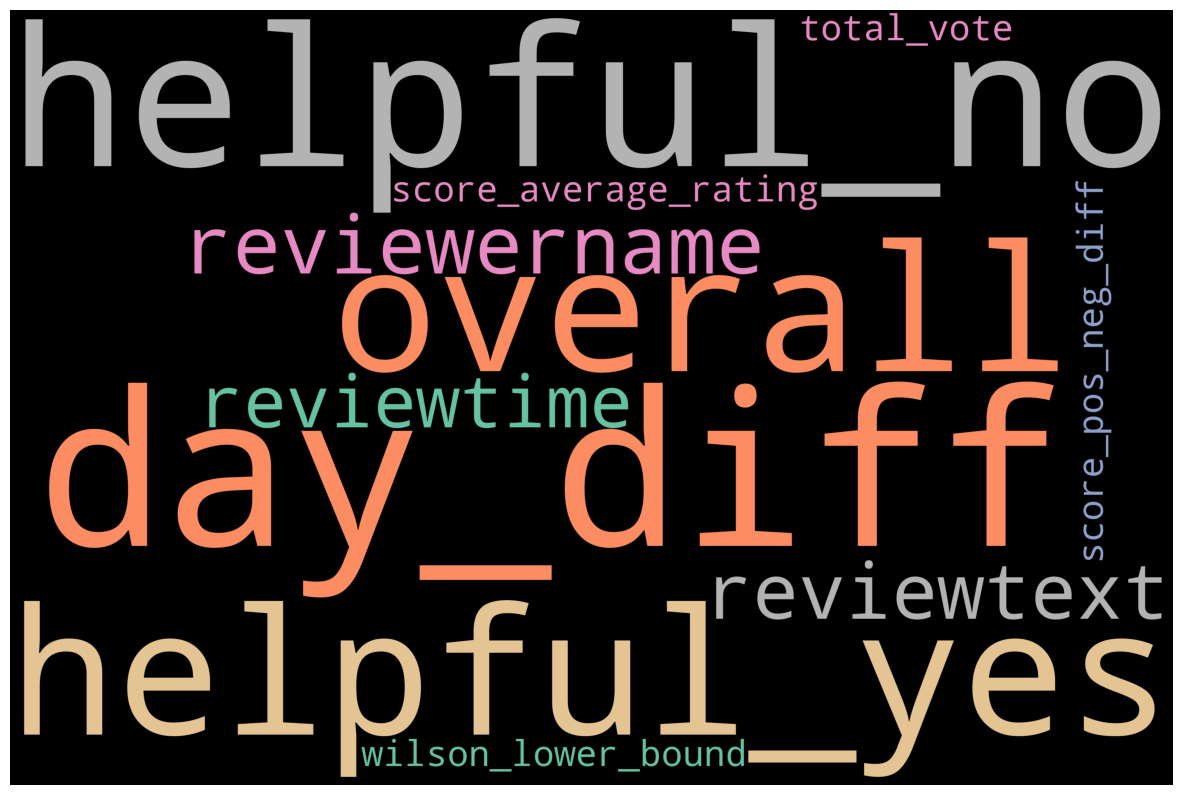

In [30]:
# Generate WordCloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(w2)
plt.figure(figsize=(15, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [31]:
#Trigram
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,2),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(df)
bow_matrix_ngram

print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

w3 = list(vectorizer_ngram_range.get_feature_names_out())
w3
w4 = ' '.join(w3)
w4
stopwords = set([word.lower() for word in STOPWORDS])


['day_diff' 'helpful_no' 'helpful_yes' 'overall' 'reviewername'
 'reviewtext' 'reviewtime' 'score_average_rating' 'score_pos_neg_diff'
 'total_vote' 'wilson_lower_bound']
[[0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]]


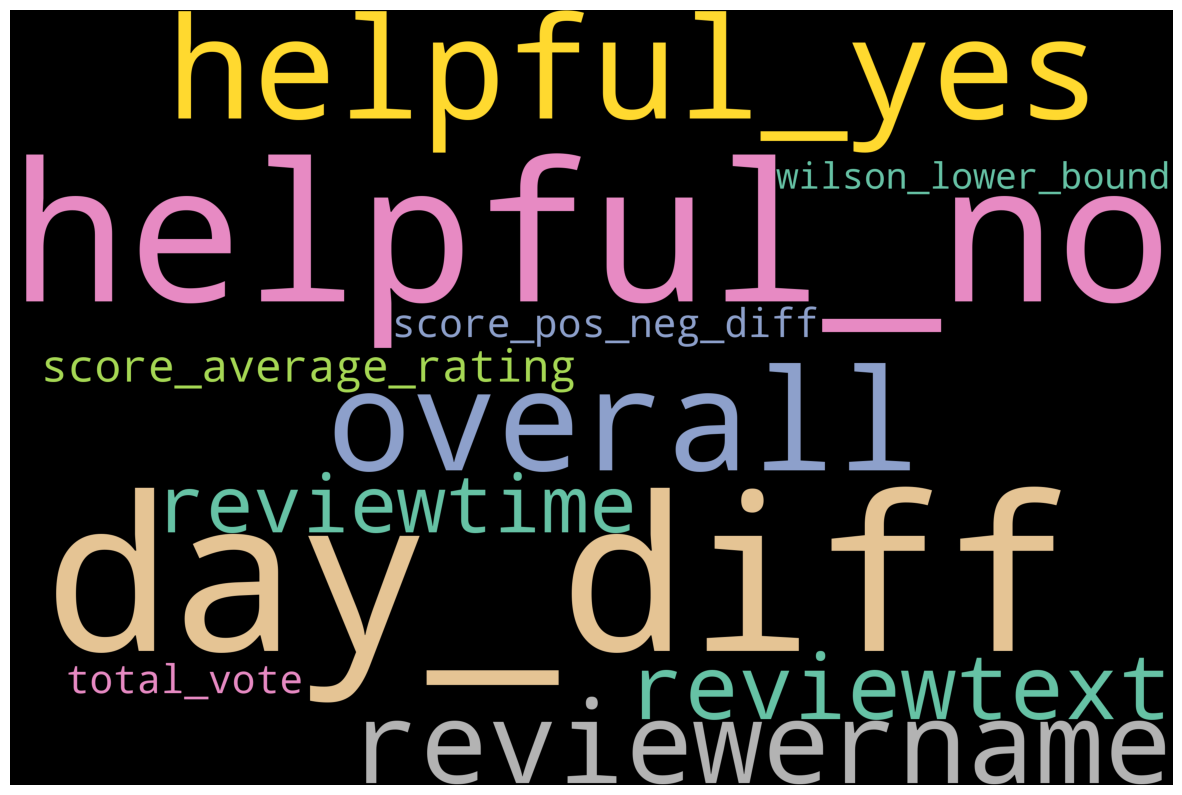

In [32]:
# Generate WordCloud
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100, colormap='Set2', stopwords=stopwords).generate(w4)
plt.figure(figsize=(15, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [34]:
# Emotion Minning
import pandas as pd
import numpy as np
df=pd.read_csv('amazon.csv')
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [36]:
pip install textblob

In [37]:
#installing textblob
from textblob import TextBlob
def get_sentiment(text):
    text = str(text)
    blob = TextBlob(text)
    return blob.sentiment.polarity

sentiment = get_sentiment(text)


In [38]:
# Example usage:
text = df['reviewText']
sentiment = get_sentiment(text)
print("Sentiment:", sentiment)

Sentiment: 0.19200000000000006
